**1. Instll Package**

In [3]:
#!pip install -q datasets

In [662]:
import tensorflow as tf
import numpy as np
import os, glob
import random

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from datasets import load_dataset 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers

In [663]:
def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    
seed_everything()

**2. Load Dataset**

In [667]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory('Train',
                                                    target_size=(124, 124),
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    shuffle = True,
                                                    class_mode='categorical')

Found 100 images belonging to 5 classes.


In [668]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = train_datagen.flow_from_directory('Test',
                                                    target_size=(124, 124),
                                                    batch_size=32,
                                                    shuffle = False,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 10 images belonging to 5 classes.


**3.EDA (Training)**

In [669]:
IMAGE_SIZE = (124, 124)
print("Number of Samples: ", train_generator.samples)
print("Number of Classes: ", len(train_generator.class_indices))
print("Number of sample per class",int(train_generator.samples/len(train_generator.class_indices)))
print("Each image is of size: {}".format(IMAGE_SIZE))

Number of Samples:  100
Number of Classes:  5
Number of sample per class 20
Each image is of size: (124, 124)


In [670]:
classes = train_generator.class_indices
classes = dict((v,k) for k,v in classes.items())
# classes = [classes[k] for k in classes]
classes

{0: 'Apple', 1: 'Banana', 2: 'Blood Orange', 3: 'Dragon Fruit', 4: 'Papaya'}

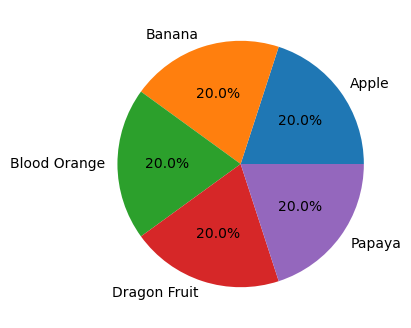

In [671]:
fruit = ['Apple','Banana','Blood Orange','Dragon Fruit','Papaya']
data = [20, 20, 20, 20,20]

fig = plt.figure(figsize =(4, 4))
plt.pie(data, labels = fruit,autopct='%1.1f%%')
 
# show plot
plt.show()

In [672]:
def view_images(ds):
    image, label = next(iter(ds)) # extract 1 batch from the dataset

    fig = plt.figure(figsize=(10, 10))
    for i in range(10):
        ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
        ax.imshow(image[i])
        ax.set_title(f"Label: {classes[np.argmax(label[i])]}",fontsize = 8)

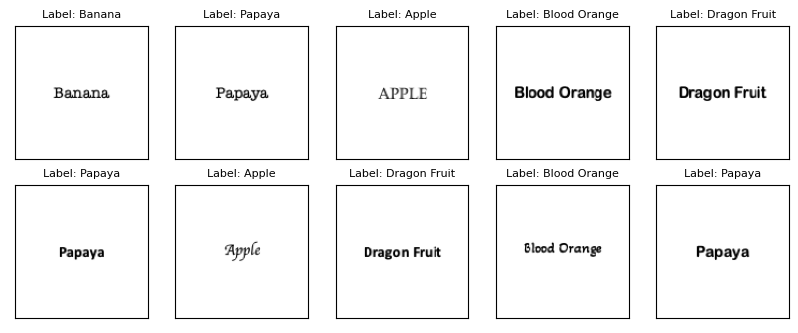

In [673]:
view_images(train_generator)

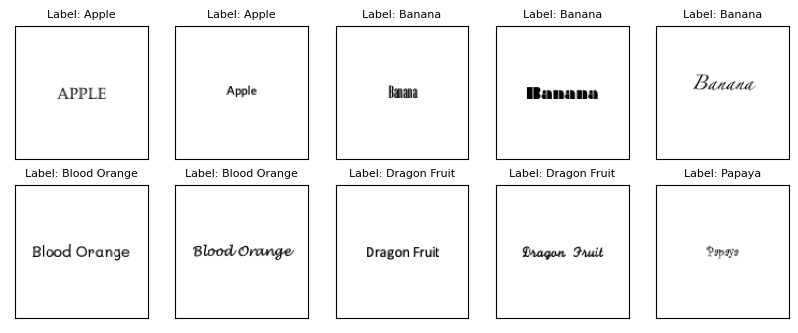

In [674]:
view_images(validation_generator)

**4. CNN Model**

* **Initial Classifier Build**

In [690]:
#defining model
CNN = Sequential()

#Conv2D layer with the following parameters
CNN.add(Conv2D(32, (3, 3), input_shape=(124, 124, 3)))
CNN.add(Activation('relu'))

#MaxPooling2D layer where pool_size = (2,2)
CNN.add(MaxPooling2D(pool_size=(2, 2)))

#Conv2D layer
CNN.add(Conv2D(124, (3, 3)))
CNN.add(Activation('relu'))

#MaxPooling2D layer where pool_size = (2,2)
CNN.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten layer
CNN.add(Flatten())

#Dense layer
CNN.add(Dense(128))
CNN.add(Activation('relu'))
CNN.add(Dropout(0.5))

#final Dense layer
CNN.add(Dense(5))
CNN.add(Activation('softmax'))

#compile model
CNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [676]:
CNN.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 122, 122, 32)      896       
                                                                 
 activation_116 (Activation)  (None, 122, 122, 32)     0         
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 59, 59, 124)       35836     
                                                                 
 activation_117 (Activation)  (None, 59, 59, 124)      0         
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 29, 29, 124)      0         
 g2D)                                                

* **Model Runs**

- steps_per_epoch = 3 & epochas = 15

In [677]:
steps_per_epoch = 3
epochs = 15

CNN_history = CNN.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data = validation_generator)

Epoch 1/15
3/3 [==============================] - 1s 279ms/step - loss: 7.9243 - accuracy: 0.2500 - val_loss: 2.7439 - val_accuracy: 0.2000
Epoch 2/15
3/3 [==============================] - 1s 158ms/step - loss: 3.1949 - accuracy: 0.2500 - val_loss: 1.6954 - val_accuracy: 0.3000
Epoch 3/15
3/3 [==============================] - 1s 242ms/step - loss: 1.7201 - accuracy: 0.2396 - val_loss: 1.6938 - val_accuracy: 0.1000
Epoch 4/15
3/3 [==============================] - 1s 157ms/step - loss: 1.6663 - accuracy: 0.1765 - val_loss: 1.5987 - val_accuracy: 0.2000
Epoch 5/15
3/3 [==============================] - 1s 166ms/step - loss: 1.5758 - accuracy: 0.2794 - val_loss: 1.6354 - val_accuracy: 0.2000
Epoch 6/15
3/3 [==============================] - 1s 241ms/step - loss: 1.5590 - accuracy: 0.2647 - val_loss: 1.5268 - val_accuracy: 0.3000
Epoch 7/15
3/3 [==============================] - 1s 154ms/step - loss: 1.4842 - accuracy: 0.6029 - val_loss: 1.4187 - val_accuracy: 0.3000
Epoch 8/15
3/3 [====

1/1 - 0s - loss: 0.8106 - accuracy: 0.6000 - 79ms/epoch - 79ms/step


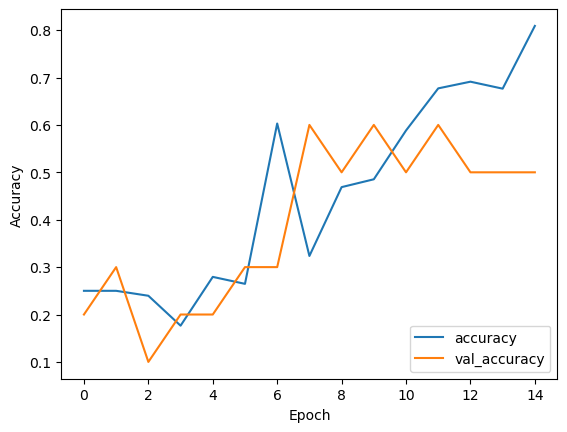

In [678]:
plt.plot(CNN_history.history['accuracy'], label='accuracy')
plt.plot(CNN_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [679]:
print(test_acc)

0.6000000238418579


In [680]:
y_test = validation_generator.classes
y_test

array([0, 0, 1, 1, 1, 2, 2, 3, 3, 4], dtype=int32)

In [681]:
validation_generator.filenames

['Apple/Picture3.png',
 'Apple/Picture8.png',
 'Banana/Picture10.png',
 'Banana/Picture2.png',
 'Banana/Picture9.png',
 'Blood Orange/Picture4.png',
 'Blood Orange/Picture7.png',
 'Dragon Fruit/Picture1.png',
 'Dragon Fruit/Picture5.png',
 'Papaya/Picture6.png']

In [682]:
predictions = CNN.predict_generator(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_pred

array([4, 0, 0, 2, 0, 2, 2, 3, 3, 0])

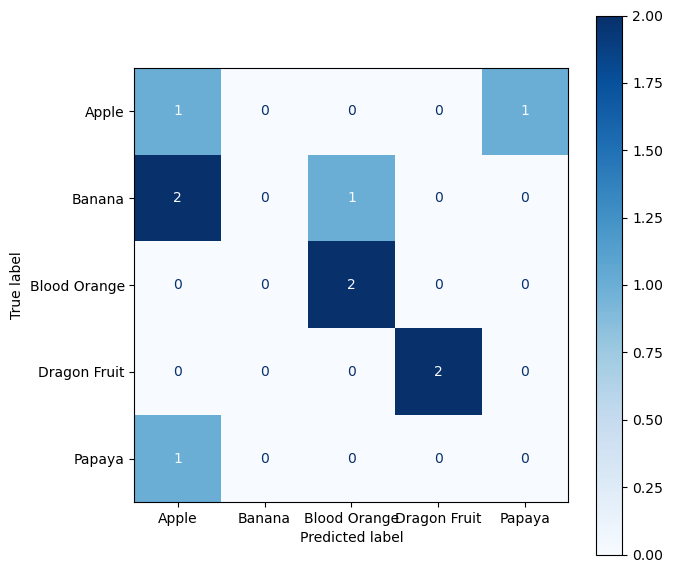

In [683]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

- steps_per_epoch = 4 & epochas = 15

In [685]:
steps_per_epoch = 4
epochs = 15

CNN_history = CNN.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data = validation_generator)

Epoch 1/15
4/4 [==============================] - 1s 263ms/step - loss: 7.6265 - accuracy: 0.1400 - val_loss: 2.0866 - val_accuracy: 0.2000
Epoch 2/15
4/4 [==============================] - 1s 177ms/step - loss: 2.6001 - accuracy: 0.1800 - val_loss: 1.6027 - val_accuracy: 0.2000
Epoch 3/15
4/4 [==============================] - 1s 180ms/step - loss: 1.6471 - accuracy: 0.2000 - val_loss: 1.6254 - val_accuracy: 0.1000
Epoch 4/15
4/4 [==============================] - 1s 180ms/step - loss: 1.6208 - accuracy: 0.2000 - val_loss: 1.5572 - val_accuracy: 0.3000
Epoch 5/15
4/4 [==============================] - 1s 181ms/step - loss: 1.5963 - accuracy: 0.1900 - val_loss: 1.5639 - val_accuracy: 0.2000
Epoch 6/15
4/4 [==============================] - 1s 184ms/step - loss: 1.5375 - accuracy: 0.3600 - val_loss: 1.5218 - val_accuracy: 0.3000
Epoch 7/15
4/4 [==============================] - 1s 184ms/step - loss: 1.4417 - accuracy: 0.3400 - val_loss: 1.3057 - val_accuracy: 0.6000
Epoch 8/15
4/4 [====

1/1 - 0s - loss: 0.8106 - accuracy: 0.6000 - 43ms/epoch - 43ms/step


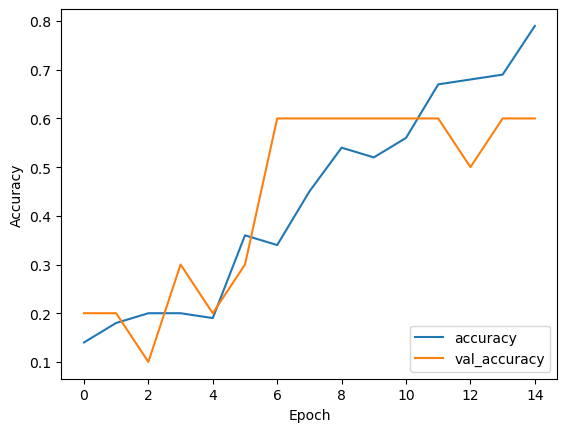

In [686]:
plt.plot(CNN_history.history['accuracy'], label='accuracy')
plt.plot(CNN_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [687]:
print(test_acc)

0.6000000238418579


In [688]:
predictions = CNN.predict_generator(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_pred

array([4, 0, 0, 1, 4, 2, 2, 3, 3, 0])

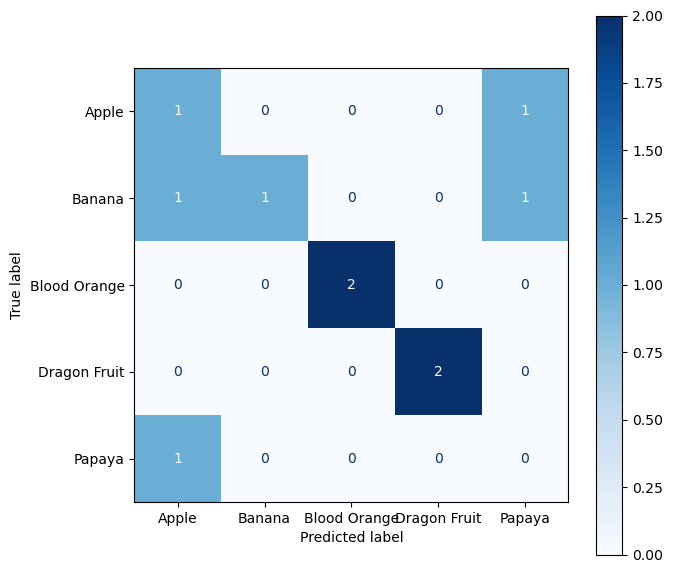

In [689]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

- steps_per_epoch = 4 & epochas = 20

In [691]:
steps_per_epoch = 4
epochs = 20

CNN_history = CNN.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data = validation_generator)

Epoch 1/20
4/4 [==============================] - 1s 212ms/step - loss: 6.1798 - accuracy: 0.2000 - val_loss: 3.3007 - val_accuracy: 0.2000
Epoch 2/20
4/4 [==============================] - 1s 216ms/step - loss: 2.6506 - accuracy: 0.1400 - val_loss: 1.5900 - val_accuracy: 0.2000
Epoch 3/20
4/4 [==============================] - 1s 235ms/step - loss: 1.6219 - accuracy: 0.2000 - val_loss: 1.5491 - val_accuracy: 0.3000
Epoch 4/20
4/4 [==============================] - 1s 238ms/step - loss: 1.5846 - accuracy: 0.2600 - val_loss: 1.4871 - val_accuracy: 0.4000
Epoch 5/20
4/4 [==============================] - 1s 238ms/step - loss: 1.4684 - accuracy: 0.3700 - val_loss: 1.4225 - val_accuracy: 0.3000
Epoch 6/20
4/4 [==============================] - 1s 176ms/step - loss: 1.3664 - accuracy: 0.4300 - val_loss: 1.1677 - val_accuracy: 0.6000
Epoch 7/20
4/4 [==============================] - 1s 233ms/step - loss: 1.1607 - accuracy: 0.4600 - val_loss: 1.1202 - val_accuracy: 0.5000
Epoch 8/20
4/4 [====

1/1 - 0s - loss: 0.8106 - accuracy: 0.6000 - 41ms/epoch - 41ms/step


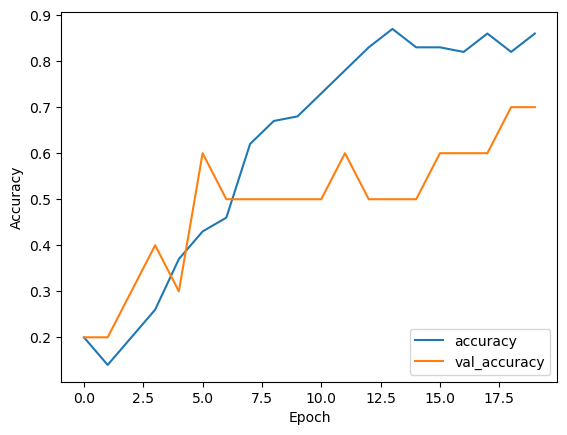

In [692]:
plt.plot(CNN_history.history['accuracy'], label='accuracy')
plt.plot(CNN_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [693]:
print(test_acc)

0.6000000238418579


In [694]:
predictions = CNN.predict_generator(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_pred

array([0, 0, 0, 1, 0, 2, 2, 3, 3, 0])

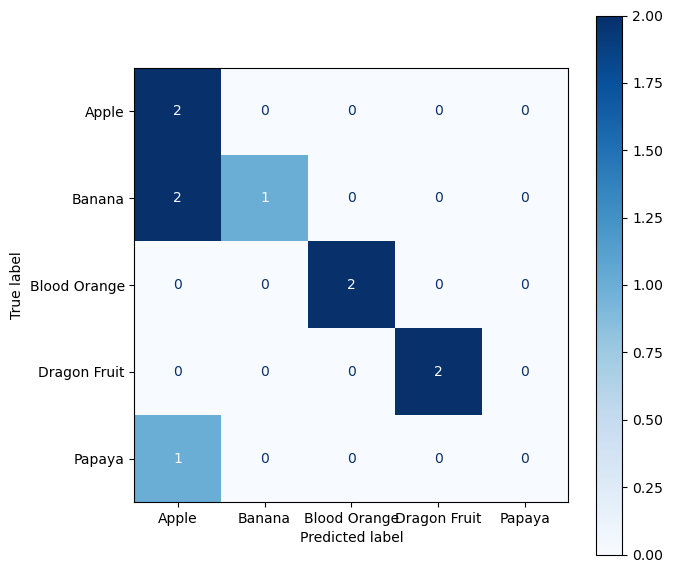

In [695]:
fig, ax = plt.subplots(figsize=(7, 7))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [696]:
CNN.save('CNN.h5')
print("Saved model")

Saved model


**5. ViT Model**

In [249]:
#pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 28.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [697]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import warnings
warnings.filterwarnings("ignore")

Configure the hyperparameters

In [698]:
num_classes = 5
learning_rate = 0.01
weight_decay = 0.0001
num_epochs = 1

patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
image_size = 124
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [56, 28] 

Implement multilayer perceptron (MLP)

In [699]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

Implement patch creation as a layer

In [700]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 124 X 124
Patch size: 6 X 6
Patches per image: 400
Elements per patch: 108


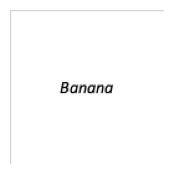

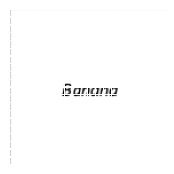

In [701]:
plt.figure(figsize=(2, 2))

x = train_generator.next()
image = x[0][1]

plt.imshow(image)
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {image_size} X {image_size}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(2, 2))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis('off')

In [702]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [703]:
def create_vit_classifier():
    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    ViT = keras.Model(inputs=inputs, outputs=logits)
    return ViT

In [704]:
ViT.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 124, 124, 3  0           []                               
                                )]                                                                
                                                                                                  
 patches_47 (Patches)           (None, None, 108)    0           ['input_45[0][0]']               
                                                                                                  
 patch_encoder_36 (PatchEncoder  (None, 400, 64)     32576       ['patches_47[0][0]']             
 )                                                                                                
                                                                                           

 multi_head_attention_291 (Mult  (None, 400, 64)     66368       ['layer_normalization_618[0][0]',
 iHeadAttention)                                                  'layer_normalization_618[0][0]']
                                                                                                  
 add_582 (Add)                  (None, 400, 64)      0           ['multi_head_attention_291[0][0]'
                                                                 , 'add_581[0][0]']               
                                                                                                  
 layer_normalization_619 (Layer  (None, 400, 64)     128         ['add_582[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 dense_786 (Dense)              (None, 400, 128)     8320        ['layer_normalization_619[0][0]']
          

                                                                                                  
 dropout_726 (Dropout)          (None, 400, 64)      0           ['dense_793[0][0]']              
                                                                                                  
 add_589 (Add)                  (None, 400, 64)      0           ['dropout_726[0][0]',            
                                                                  'add_588[0][0]']                
                                                                                                  
 layer_normalization_626 (Layer  (None, 400, 64)     128         ['add_589[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention_295 (Mult  (None, 400, 64)     66368       ['layer_normalization_626[0][0]',
 iHeadAtte

In [705]:
decay_steps = train_generator.n // train_generator.batch_size
initial_learning_rate = learning_rate

lr_decayed_fn = tf.keras.experimental.CosineDecay(initial_learning_rate, decay_steps)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decayed_fn)

In [706]:
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

ViT = create_vit_classifier()

#STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
#STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size
    
ViT.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.1), 
              metrics = ['accuracy'])

'''
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 10,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)
'''
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './ViT.h5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks =  [lr_scheduler, checkpointer]

ViT_history = ViT.fit(train_generator,
              steps_per_epoch = 3,
              validation_data = validation_generator,
              #validation_steps = 3,
              epochs = 20)
              #callbacks = callbacks)

Epoch 1/20
3/3 [==============================] - 12s 4s/step - loss: 6.0228 - accuracy: 0.2500 - val_loss: 5.2284 - val_accuracy: 0.3000
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 5.6574 - accuracy: 0.2059 - val_loss: 5.3611 - val_accuracy: 0.2000
Epoch 3/20
3/3 [==============================] - 9s 3s/step - loss: 6.3624 - accuracy: 0.2083 - val_loss: 5.0280 - val_accuracy: 0.2000
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 5.9128 - accuracy: 0.1765 - val_loss: 8.6639 - val_accuracy: 0.2000
Epoch 5/20
3/3 [==============================] - 6s 3s/step - loss: 6.9051 - accuracy: 0.2941 - val_loss: 8.2631 - val_accuracy: 0.2000
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 7.9661 - accuracy: 0.2059 - val_loss: 8.2301 - val_accuracy: 0.2000
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 7.9005 - accuracy: 0.1765 - val_loss: 8.2215 - val_accuracy: 0.2000
Epoch 8/20
3/3 [========================

1/1 - 0s - loss: 3.6312 - accuracy: 0.2000 - 302ms/epoch - 302ms/step


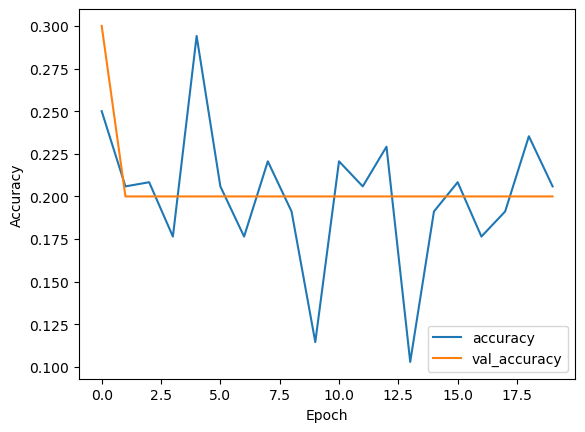

In [707]:
plt.plot(ViT_history.history['accuracy'], label='accuracy')
plt.plot(ViT_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = ViT.evaluate(validation_generator, verbose=2)

In [708]:
predictions = ViT.predict_generator(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [713]:
predictions

array([[ 2397.1843 ,  -872.21826,  -747.2046 ,  -917.4957 , -1364.7458 ],
       [ 2397.203  ,  -872.2446 ,  -747.20844,  -917.4975 , -1364.7732 ],
       [ 2397.1772 ,  -872.1871 ,  -747.1785 ,  -917.4723 , -1364.706  ],
       [ 2396.9785 ,  -871.8602 ,  -746.9178 ,  -917.39355, -1364.3585 ],
       [ 2397.0925 ,  -872.1701 ,  -747.1927 ,  -917.4598 , -1364.6836 ],
       [ 2397.0835 ,  -872.05994,  -747.1122 ,  -917.4579 , -1364.5958 ],
       [ 2397.0598 ,  -872.0202 ,  -747.1056 ,  -917.45355, -1364.5593 ],
       [ 2397.151  ,  -872.11957,  -747.1215 ,  -917.47284, -1364.642  ],
       [ 2397.0796 ,  -872.0768 ,  -747.1094 ,  -917.46063, -1364.6028 ],
       [ 2397.24   ,  -872.2619 ,  -747.2335 ,  -917.50165, -1364.7893 ]],
      dtype=float32)

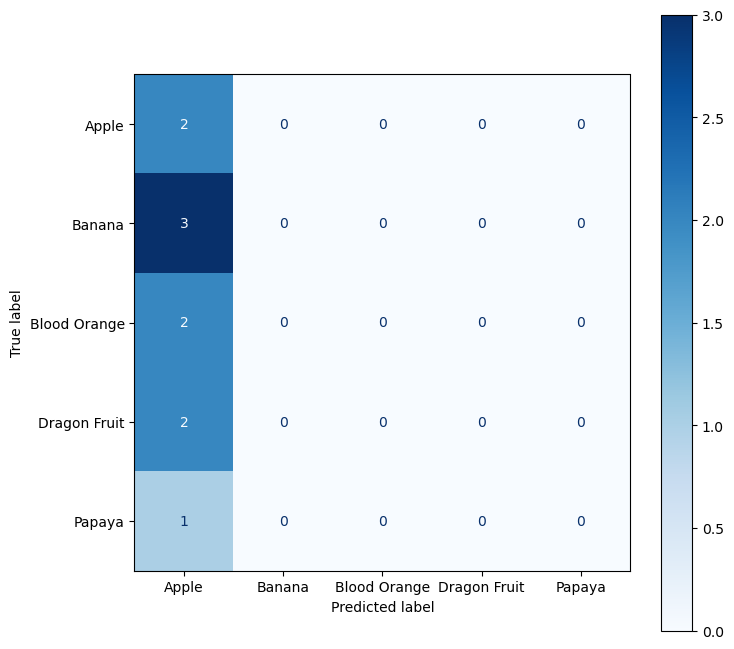

In [710]:
fig, ax = plt.subplots(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()